# Analytical Analysis of OStwald ripening


## Model Parameters

- **Free energy**  
  $$f(\phi) = \frac{A}{2}\,\phi^2 \;+\; \frac{B}{4}\,\phi^4$$

- **Gradient energy coefficient**  
  \(K\)

- **Time-reversal symmetry-breaking parameters**  
  \(\zeta,\;\lambda\)

- **Pseudodensity slope**  
  $$\alpha = \frac{\zeta - 2\lambda}{K}$$

---

## Step 1–2: Binodal Determination via Pseudopotential Method (Appendix B)

1. **Pseudodensity**  
   $$\psi(\phi) = \int e^{\alpha\phi}\,d\phi$$

2. **Pseudopotential**  
   $$g(\phi) = \int f'(\phi)\,e^{\alpha\phi}\,d\phi$$

3. **Chemical potential**  
   $$\mu(\phi) = f'(\phi)$$

4. **Pseudopressure**  
   $$P(\phi) = \psi(\phi)\,\mu(\phi) - g(\phi)$$

5. **Binodal conditions**  
   Find \(\phi_1, \phi_2\) such that
   \[
   \begin{cases}
     \mu(\phi_1) = \mu(\phi_2),\\
     P(\phi_1) = P(\phi_2).
   \end{cases}
   \]

---

## Step 3: Interface Profile via Boundary-Value Problem (Appendix C)

Solve the stationary profile
\[
\frac{d^2\phi}{dx^2}
= \frac{df}{d\phi} - \mu
\]
subject to
\(\phi(-L)=\phi_1, \phi(+L)=\phi_2\).

Let the solution be \(\phi_0(x)\). Then compute
\[
S_0 = \int\Bigl(\tfrac{d\phi_0}{dx}\Bigr)^2\,dx,
\quad
S_1 = \int \phi_0(x)\,\Bigl(\tfrac{d\phi_0}{dx}\Bigr)^2\,dx.
\]

---

## Step 4: Pseudotension Computation (Appendix C)

Define the **pseudotension** as
\[
\sigma
= \frac{K}{\zeta - 2\lambda}
  \bigl(\zeta\,S_0 - 2\lambda\,S_1\bigr).
\]
This generalizes interfacial tension and can become **negative** in active systems.

---

## Step 5: Droplet Growth and Curvature Corrections (Appendix E)

1. **Second derivatives of \(f\)** at the binodals  
   \[
   f''(\phi_i) = A + 3B\,\phi_i^2,\quad i=1,2.
   \]

2. **Curvature coefficients**  
   \[
   a_+ = -\frac{\sigma}{f''(\phi_1)},
   \quad
   a_- = \frac{\sigma}{f''(\phi_2)}.
   \]

3. **Curvature-corrected densities**  
   \[
   \phi_+ = \phi_1 + \frac{a_+}{R},
   \quad
   \phi_- = \phi_2 + \frac{a_-}{R}.
   \]

4. **Droplet growth rate**  
   \[
   \dot{R} \propto \frac{\phi_+ - \phi_-}{R}.
   \]

---

## Interpretation of Final Graph

Plotting \(\dot{R}\) vs.\ \(R\) shows:

- \(\dot{R} > 0\): growth  
- \(\dot{R} < 0\): shrinkage  
- The zero-crossing (\(\phi_+ = \phi_-\)) marks a **stable droplet size**, characteristic of **microphase separation**.  

In passive systems, \(\dot R\) remains positive for large \(R\), but here a **negative pseudotension** reverses that trend, halting ripening at a finite size.





Coexisting densities: phi1 = -1.1361, phi2 = 0.7470


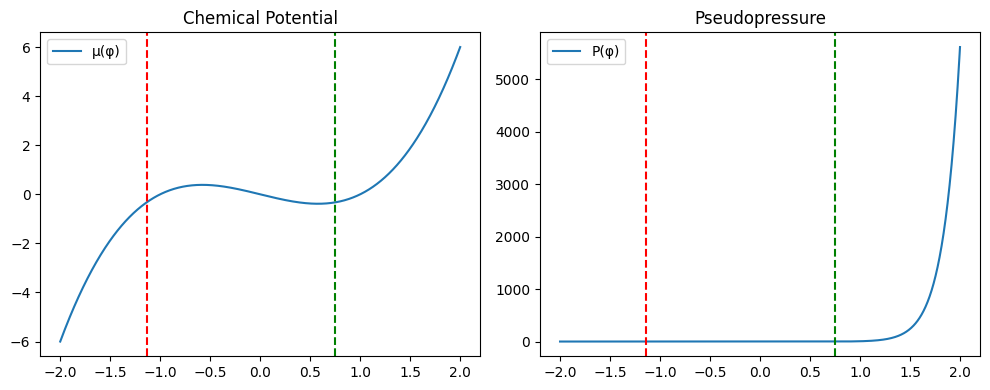

In [60]:
import numpy as np
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Model parameters
A = -1
B = 1
K = 1
zeta = 4   # Try a value like 1.0 or 2.0
lmbda = -0.40   # Lambda spelled out

alpha = (zeta - 2 * lmbda) / K

# Define phi grid
phi = np.linspace(-2, 2, 1000)

# Step 1: Pseudodensity psi(phi)
dpsi_dphi = np.exp(alpha * phi)
psi = cumulative_trapezoid(dpsi_dphi, phi, initial=0)

# Step 2: Pseudopotential g(phi)
f_prime = A * phi + B * phi**3
dg_dphi = f_prime * dpsi_dphi
g = cumulative_trapezoid(dg_dphi, phi, initial=0)

# Interpolators for numerical functions
from scipy.interpolate import interp1d
mu_interp = interp1d(phi, f_prime, kind='cubic')
psi_interp = interp1d(phi, psi, kind='cubic')
g_interp = interp1d(phi, g, kind='cubic')
P_interp = lambda x: psi_interp(x) * mu_interp(x) - g_interp(x)

# Step 3: Solve for phi1 and phi2
def coexistence_system(vars):
    phi1, phi2 = vars
    return [
        mu_interp(phi1) - mu_interp(phi2),
        P_interp(phi1) - P_interp(phi2)
    ]

phi_guess = [-1.0, 1.0]
phi1, phi2 = fsolve(coexistence_system, phi_guess)

print(f"Coexisting densities: phi1 = {phi1:.4f}, phi2 = {phi2:.4f}")

# Optional: Plot chemical potential and pseudopressure
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(phi, f_prime, label='μ(φ)')
plt.axvline(phi1, color='red', linestyle='--')
plt.axvline(phi2, color='green', linestyle='--')
plt.title('Chemical Potential')
plt.legend()

plt.subplot(1, 2, 2)
P_vals = P_interp(phi)
plt.plot(phi, P_vals, label='P(φ)')
plt.axvline(phi1, color='red', linestyle='--')
plt.axvline(phi2, color='green', linestyle='--')
plt.title('Pseudopressure')
plt.legend()

plt.tight_layout()
plt.show()


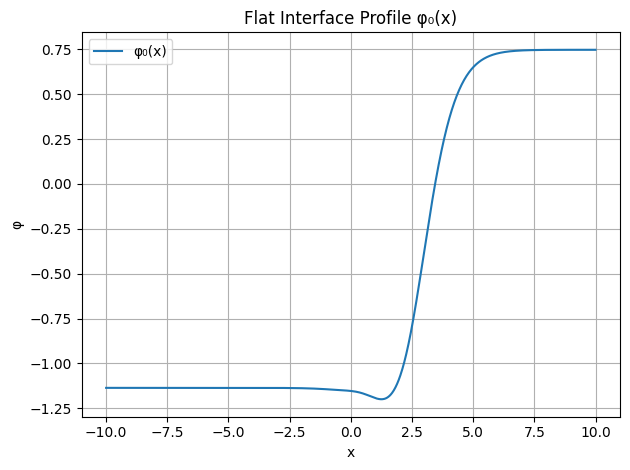

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

# Use your binodal values from Appendix B
phi1 = phi1
phi2 = phi2

# Model parameters
A = -1
B = 1
K = 1
mu = A * phi1 + B * phi1**3  # You can also average mu(phi1) and mu(phi2)

# Define the ODE: d²φ/dx² = (df/dφ - μ) / K
def ode(x, y):
    phi = y[0]
    dphi_dx = y[1]
    df_dphi = A * phi + B * phi**3
    d2phi_dx2 = (df_dphi - mu) / K
    return np.vstack([dphi_dx, d2phi_dx2])

# Boundary conditions: phi at -L and +L
def bc(ya, yb):
    return np.array([ya[0] - phi1, yb[0] - phi2])

# Spatial domain
L = 10
x = np.linspace(-L, L, 500)
# Initial guess: tanh-like profile
phi_guess = phi1 + (phi2 - phi1) * (np.tanh(x) + 1)/2
y_guess = np.vstack([phi_guess, np.gradient(phi_guess, x)])

# Solve BVP
sol = solve_bvp(ode, bc, x, y_guess)

# Plot result
x_plot = sol.x
phi0 = sol.y[0]
dphi_dx = sol.y[1]

plt.plot(x_plot, phi0, label='φ₀(x)')
plt.xlabel("x")
plt.ylabel("φ")
plt.title("Flat Interface Profile φ₀(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [62]:
from scipy.integrate import simpson

# Extract profile and derivative from the BVP solution
x_vals = sol.x
phi_vals = sol.y[0]
dphi_dx_vals = sol.y[1]

# Compute S0 and S1
S0 = simpson(dphi_dx_vals**2, x_vals)
S1 = simpson(phi_vals * dphi_dx_vals**2, x_vals)



denom = zeta - 2 * lmbda
if np.abs(denom) < 1e-6:
    raise ValueError("Denominator ζ − 2λ is too small, pseudotension is ill-defined.")

sigma = K / denom * (zeta * S0 - 2 * lmbda * S1)

print(f"S₀ = {S0:.6f}")
print(f"S₁ = {S1:.6f}")
print(f"Pseudotension σ = {sigma:.6f}")


S₀ = 1.198477
S₁ = -0.362828
Pseudotension σ = 0.938259


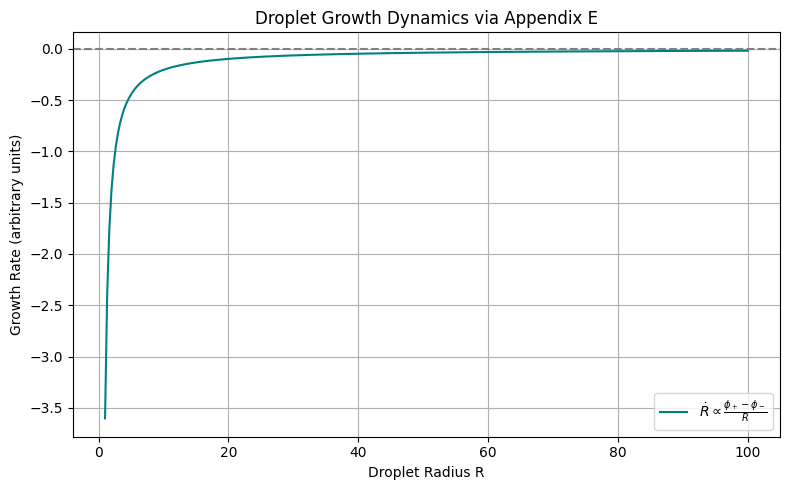

In [63]:
import numpy as np
import matplotlib.pyplot as plt
sigma = sigma # Your computed pseudotension

# Second derivatives of f at binodals
fpp_phi1 = A + 3 * B * phi1**2
fpp_phi2 = A + 3 * B * phi2**2

# Compute curvature correction coefficients
a_plus = -sigma / fpp_phi1
a_minus = sigma / fpp_phi2

# Radii range
R_vals = np.linspace(1, 100, 300)
phi_plus = phi1 + a_plus / R_vals
phi_minus = phi2 + a_minus / R_vals

# Growth rate (up to constant)
dR_dt = (phi_plus - phi_minus) / R_vals

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(R_vals, dR_dt, label=r"$\dot{R} \propto \frac{\phi_+ - \phi_-}{R}$", color='teal')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Droplet Radius R")
plt.ylabel("Growth Rate (arbitrary units)")
plt.title("Droplet Growth Dynamics via Appendix E")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
import numpy as np
from scipy.integrate import cumulative_trapezoid, simpson
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
from scipy.integrate import solve_bvp

def compute_sigma(zeta, lam, A=-1, B=1, K=1, L=10, N=500):
    """
    Compute the pseudotension σ and check inequality (23) for given (zeta, lambda).

    Returns
    -------
    sigma : float
        The computed pseudotension.
    is_reverse : bool
        True if |zeta-2λ| < -zeta * |1 - S0/S1|  (i.e. σ<0 regime).
    """
    # 1) alpha, pseudodensity & pseudopotential on a phi-grid
    alpha = (zeta - 2*lam)/K
    phi_g = np.linspace(-2, 2, 1000)
    dpsi = np.exp(alpha * phi_g)
    psi  = cumulative_trapezoid(dpsi, phi_g, initial=0)
    fprime = A*phi_g + B*phi_g**3
    g     = cumulative_trapezoid(fprime * dpsi, phi_g, initial=0)

    # 2) interpolators
    mu   = interp1d(phi_g, fprime, kind='cubic')
    psiI = interp1d(phi_g, psi,   kind='cubic')
    gI   = interp1d(phi_g, g,     kind='cubic')
    P    = lambda φ: psiI(φ)*mu(φ) - gI(φ)

    # 3) find binodal φ1, φ2
    def eqs(v):
        p1, p2 = v
        return [mu(p1)-mu(p2), P(p1)-P(p2)]
    phi1, phi2 = fsolve(eqs, [-1,1])

    # 4) solve the BVP for φ0(x)
    mu0 = 0.5*(mu(phi1)+mu(phi2))
    def ode(x,y):
        return np.vstack([ y[1],
                           (A*y[0]+B*y[0]**3 - mu0)/K ])
    def bc(ya,yb):
        return [ya[0]-phi1, yb[0]-phi2]

    x_dom = np.linspace(-L, L, N)
    phi_init = phi1 + (phi2-phi1)*(np.tanh(x_dom)+1)/2
    y_init   = np.vstack([phi_init, np.gradient(phi_init, x_dom)])
    sol = solve_bvp(ode, bc, x_dom, y_init, tol=1e-5)

    # 5) compute S0, S1
    dφ = sol.y[1]
    S0 = simpson(dφ**2, sol.x)
    S1 = simpson(sol.y[0] * dφ**2, sol.x)

    # 6) pseudotension
    denom = zeta - 2*lam
    sigma = K/denom * (zeta*S0 - 2*lam*S1)

    # 7) check inequality (23)
    lhs = abs(denom)
    rhs = -zeta * abs(1 - S0/S1)
    is_reverse = (lhs < rhs)

    return sigma, is_reverse


In [65]:
σ, reverse_flag = compute_sigma(zeta=4, lam=2.5)
print("σ =", σ)
print("Reverse Ostwald regime (σ<0)?", reverse_flag)


σ = -3.769983698295624
Reverse Ostwald regime (σ<0)? False
